i have downloaded 

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def read_text(file_path, encoding='utf-8'):
    with open(file_path, 'r', encoding=encoding) as file:
        text = file.read()
    return text

# Sample text for the word cloud
file_path = 'C:/NLTK/sample.txt'
text = read_text(file_path)

# Tokenize and convert to lower case
words = word_tokenize(text.lower())

# Join the words back into a single string
words_string = ' '.join(words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words_string)

# Display the generated word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


In [3]:
from nltk import pos_tag
from nltk.probability import FreqDist

# Function to get the most frequent noun
def get_main_topic(words):
    words_pos = pos_tag(words)
    nouns = [word for word, pos in words_pos if pos.startswith('NN')]
    fdist = FreqDist(nouns)
    main_topic = fdist.max()
    return main_topic

main_topic = get_main_topic(words)
print(f"Main topic: {main_topic}")


Main topic: animals


In [16]:
# Function to generate WordNet tree
def generate_wordnet_tree(word):
    synsets = wn.synsets(word)
    if not synsets:
        return None
    
    main_synset = synsets[0]
    G = nx.DiGraph()
    G.add_node(main_synset.name(), label=main_synset.name().split('.')[0])
    
    def add_hyponyms(synset, parent):
        for hyponym in synset.hyponyms():
            G.add_node(hyponym.name(), label=hyponym.name().split('.')[0])
            G.add_edge(parent, hyponym.name())
            add_hyponyms(hyponym, hyponym.name())
    
    def add_hypernyms(synset, child):
        for hypernym in synset.hypernyms():
            G.add_node(hypernym.name(), label=hypernym.name().split('.')[0])
            G.add_edge(hypernym.name(), child)
            add_hypernyms(hypernym, hypernym.name())
    
    add_hyponyms(main_synset, main_synset.name())
    add_hypernyms(main_synset, main_synset.name())
    
    return G

G = generate_wordnet_tree(main_topic)
    

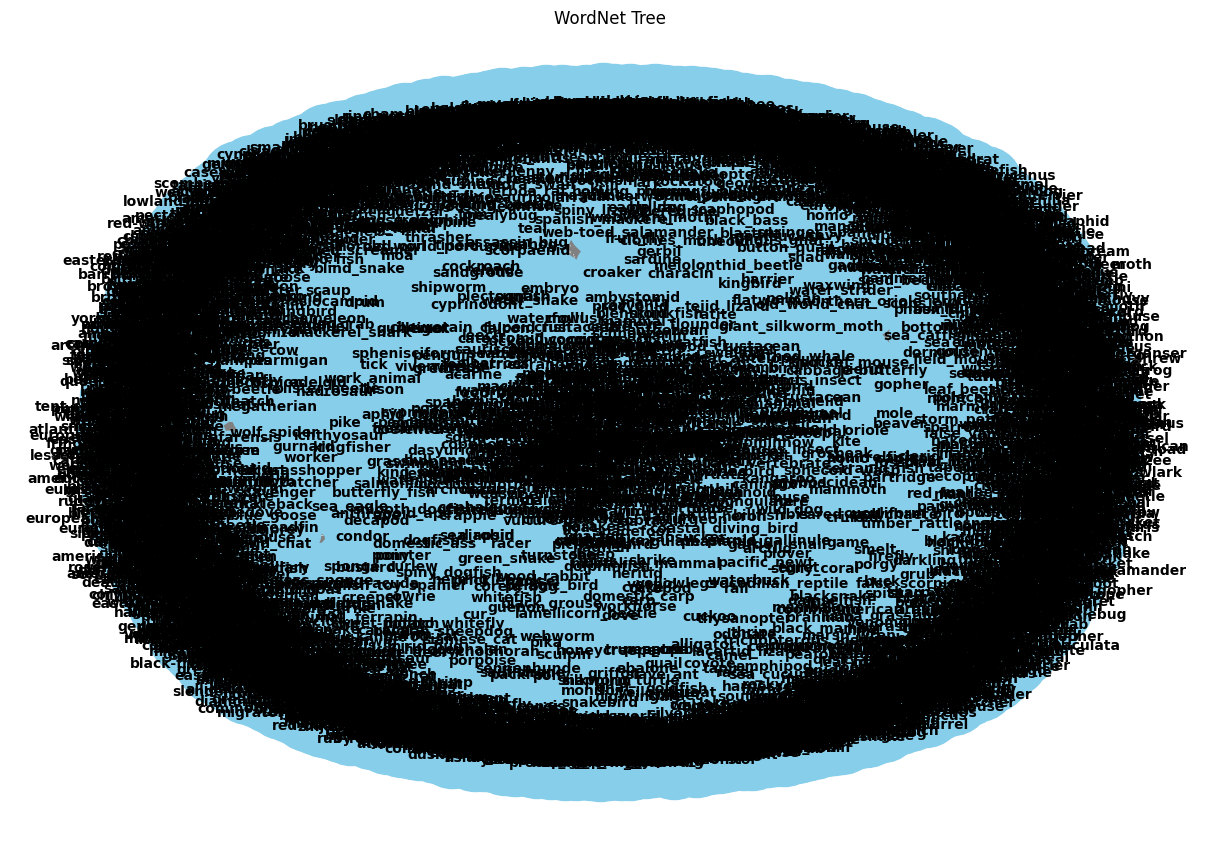

In [17]:
# Function to visualize the WordNet tree
def draw_wordnet_tree(G):
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=3000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray')
    plt.title('WordNet Tree')
    plt.show()

if G:
    draw_wordnet_tree(G)
else:
    print("No WordNet data found for the main topic.")
